#  Binary Deep Learning Algorithm

# Import libraries
Imported Libraries to be used

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

# Preprocessing Dataset
Make a dataframe with the file names for the images and the labels that go with it  then make the training set and validation set with the location for the images. Making sure to change to greyscale as even though the images are greyscale they are saved as RGB.

In [2]:
df=pd.read_csv('./dataset/label_binary.csv',dtype=str)
df_test=pd.read_csv('./test/label_binary.csv',dtype=str) #to test algorithm against set

training_datagen = ImageDataGenerator(
rescale =1./255,
validation_split = 0.20)

training_set = training_datagen.flow_from_dataframe(
dataframe = df,
directory = './dataset/image/',
x_col = "file_name",
y_col = "label",
subset = "training",
seed = 21,
target_size = (256, 256), # Can change 512 to see effect of squishing data
batch_size = 30,
class_mode = 'categorical',
shuffle = True,
color_mode = 'grayscale')

validation_set = training_datagen.flow_from_dataframe(
dataframe = df,
directory = './dataset/image/',
x_col = "file_name",
y_col = "label",
subset = "validation",
seed = 21,
target_size = (256, 256), # Can change 512 to see effect of squishing data
batch_size = 30,
#class_mode = 'binary',
class_mode = 'categorical',
shuffle = True,
color_mode = 'grayscale') 

#Image Datagenerator to test algorithm with unseen dataset
datagen=ImageDataGenerator(
rescale=1./255.)

testing_set=datagen.flow_from_dataframe(
dataframe=df_test,
directory="test/image/",
x_col="file_name",
y_col=None,
seed=21,
target_size=(256,256),
batch_size=30,
shuffle=False,
class_mode=None,
color_mode = "grayscale" )

Found 2400 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.
Found 200 validated image filenames.


# Create the model
Building a model using Keras' Sequential as it's the most common. Create blank instance and then add layers as necessary. Layer 1 is a convolution with a 3x3 filter, keeping the image size constant by setting padding to same. Set pooling and droput rate. 

In [3]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(256,256,1), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32, 3, input_shape=(256,256,1), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(Dense(2, activation='softmax'))#2 for no. o classes at end
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0

In [5]:
np.random.seed(21)

history = model.fit(
x = training_set,
validation_data=validation_set, 
epochs=12)


# FOR THE GITHUB AS USED IN AN OLD PROJECT
model.save("CNN_Binary.h5",overwrite=True,include_optimizer=True) 
Hist=pd.DataFrame(history.history)
Hist.to_csv("Binary_History.csv",index=False)

Epoch 1/12
80/80 [==============================] - 498s 6s/step - loss: 0.6459 - accuracy: 0.7038 - val_loss: 0.4932 - val_accuracy: 0.8617
Epoch 2/12
80/80 [==============================] - 495s 6s/step - loss: 0.4391 - accuracy: 0.8342 - val_loss: 0.4099 - val_accuracy: 0.8733
Epoch 3/12
80/80 [==============================] - 497s 6s/step - loss: 0.3005 - accuracy: 0.8925 - val_loss: 0.6094 - val_accuracy: 0.6217
Epoch 4/12
80/80 [==============================] - 489s 6s/step - loss: 0.2170 - accuracy: 0.9283 - val_loss: 0.3553 - val_accuracy: 0.8717
Epoch 5/12
80/80 [==============================] - 492s 6s/step - loss: 0.1597 - accuracy: 0.9450 - val_loss: 0.3831 - val_accuracy: 0.8367
Epoch 6/12
80/80 [==============================] - 487s 6s/step - loss: 0.2128 - accuracy: 0.9154 - val_loss: 0.7324 - val_accuracy: 0.6517
Epoch 7/12
80/80 [==============================] - 487s 6s/step - loss: 0.1598 - accuracy: 0.9417 - val_loss: 0.1688 - val_accuracy: 0.9367
Epoch 8/12
80

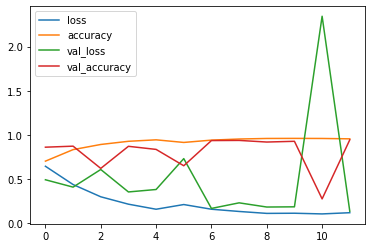

In [11]:
pd.DataFrame(history.history).plot()
plt.show()

In [12]:
print(Hist)

        loss  accuracy  val_loss  val_accuracy
0   0.645916  0.703750  0.493246      0.861667
1   0.439075  0.834167  0.409883      0.873333
2   0.300532  0.892500  0.609432      0.621667
3   0.216953  0.928333  0.355305      0.871667
4   0.159690  0.945000  0.383052      0.836667
5   0.212828  0.915417  0.732366      0.651667
6   0.159781  0.941667  0.168781      0.936667
7   0.134548  0.954167  0.232027      0.938333
8   0.112696  0.960417  0.184632      0.920000
9   0.114488  0.961250  0.186988      0.928333
10  0.106748  0.960417  2.343251      0.276667
11  0.120449  0.956250  0.137145      0.945000


In [13]:
model.evaluate(
    x=validation_set,
    steps = 19 # 19 gave close vals here and lower
)

19/19 [==============================] - 14s 718ms/step - loss: 0.1309 - accuracy: 0.9456


[0.13093335926532745, 0.9456140398979187]

In [1]:
pred=model.predict(testing_set,verbose=1)
print(pred)
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

NameError: name 'model' is not defined

In [15]:
labels = (training_set.class_indices)
print(labels)

#To convert the predicted matrix into the correct form so the model can compare result.Predictions and df_test.label
labels = dict((a,b) for b,a in labels.items())
predictions = [labels[i] for i in predicted_class_indices]

result=pd.DataFrame({"Filename":testing_set.filenames,"Predictions":predictions})
evals = result.Predictions == df_test.label 
print('Test Accuracy',np.count_nonzero(evals)/len(evals)*100,'%')

Test Accuracy 94.5 %
